In [22]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
from joblib import dump
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
titanic_train = pd.read_csv("titanic/train.csv")
titanic_test = pd.read_csv("titanic/test.csv")
correction = pd.read_csv("titanic/gender_submission.csv")
columntomodify=['Sex','Age','Fare','Embarked']
dico_replacement={'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8,'I':9,'J':10,'K':11,'L':12,'M':13,'N':14,'O':15,'P':16,'Q':17,'R':18,'S':19,'T':20}

In [24]:
titanic_train.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
titanic_train['Cabin'].fillna(value='0',inplace=True)

N1=len(titanic_train['Cabin'])
N2=len(titanic_test['Cabin'])
k=0
i=0
while k < N1:
    if titanic_train['Cabin'][k]!='0':
        index=titanic_train['Cabin'][k][0]
        titanic_train.loc[k,'Cabin']=dico_replacement[index]
    else:
        titanic_train.loc[k,'Cabin']=0
    k+=1
    

titanic_train.dropna(inplace=True)

getrid1=pd.get_dummies(titanic_train[columntomodify])
titanic_trainf=pd.concat([titanic_train,getrid1],axis=1)
titanic_trainf.drop(columntomodify,axis=1,inplace=True)

In [25]:
titanic_test.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
titanic_test['Cabin'].fillna(value='0',inplace=True)
while i < N2:
    if titanic_test['Cabin'][i]!='0':
        index=titanic_test['Cabin'][i][0]
        titanic_test.loc[i,'Cabin']=dico_replacement[index]
    else:
        titanic_test.loc[i,'Cabin']=0
    i+=1

getrid2=pd.get_dummies(titanic_test[columntomodify])
titanic_testf=pd.concat([titanic_test,getrid2],axis=1)
titanic_testf.drop(columntomodify,axis=1,inplace=True)

In [26]:
yfit=titanic_trainf['Survived']
xfit=titanic_trainf.drop('Survived',axis=1)
correction.drop('PassengerId',axis=1)

Survived
0           0
1           1
2           0
3           0
4           1
..        ...
413         0
414         1
415         0
416         0
417         0

[418 rows x 1 columns]

In [27]:
hyperparam = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['none', 'l2'], 'max_iter':[10,100,200,400,800,1000], 'verbose' : [0,1,2,3]}

In [ ]:
logiRegr=LogisticRegression()
best_param = GridSearchCV(logiRegr, hyperparam, cv=5, scoring='accuracy')

best_param.fit(xfit,yfit)

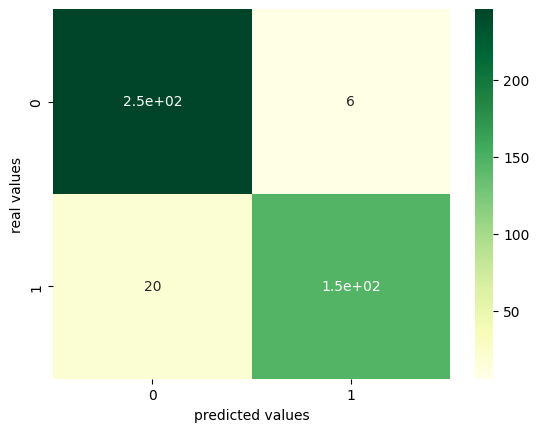

LogisticRegression(C=1, max_iter=10)
0.937799043062201


In [29]:
correction=correction['Survived']

titanic_predict=best_param.predict(titanic_testf)

c=confusion_matrix(titanic_predict, correction)
sns.heatmap(c, annot=True, cmap="YlGn", xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("predicted values")
plt.ylabel("real values")
plt.show()


print(best_param.best_estimator_)
print(accuracy_score(titanic_predict,correction))